We need to change the working directory from its current folder to its parent folder
* We access the current directory with os.getcwd()

In [3]:
import os
current_dir = os.getcwd()
current_dir

'/Users/jacobambat/dev/Healthcare_Insurance/jupyter_notebooks'

We want to make the parent of the current directory the new current directory
* os.path.dirname() gets the parent directory
* os.chir() defines the new current directory

In [4]:
os.chdir(os.path.dirname(current_dir))
print("You set a new current directory")

You set a new current directory


Confirm the new current directory

In [5]:
current_dir = os.getcwd()
current_dir

'/Users/jacobambat/dev/Healthcare_Insurance'

DOWNLOAD FROM KAGGLE

In [6]:
os.environ['KAGGLE_CONFIG_DIR'] = os.getcwd()
!chmod 600 kaggle.json

In [7]:
KaggleDatasetPath = "willianoliveiragibin/healthcare-insurance"
DestinationFolder = "dataset/raw"

In [8]:
print(DestinationFolder)

dataset/raw


In [9]:
! kaggle datasets download -d {KaggleDatasetPath} -p {DestinationFolder}

Dataset URL: https://www.kaggle.com/datasets/willianoliveiragibin/healthcare-insurance
License(s): CC0-1.0


In [10]:
import os
import zipfile
import glob

zip_files = glob.glob(os.path.join(DestinationFolder, "*.zip"))
print(zip_files)

for zip_file in zip_files:
    print('zip_file')
    with zipfile.ZipFile(zip_file, 'r') as zip_ref:
        zip_ref.extractall(DestinationFolder)  # Extract here
    os.remove(zip_file)  # Remove the ZIP file after extraction

print("Extraction complete.")
#read csv file

['dataset/raw/healthcare-insurance.zip']
zip_file
Extraction complete.


In [37]:
import pandas as pd
df = pd.read_csv(f'{DestinationFolder}/insurance.csv')
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [38]:
#check object types and memory details of the collumn values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [39]:
#check the dataframe shape
df.shape

(1338, 7)

In [40]:
# Identify duplicate rows
duplicates = df[df.duplicated()]
print("Duplicate Rows:")
print(duplicates)

Duplicate Rows:
     age   sex    bmi  children smoker     region    charges
581   19  male  30.59         0     no  northwest  1639.5631


In [41]:
#remove the duplicate row
df.drop(index = 581, inplace = True)

In [42]:
print(duplicates)

     age   sex    bmi  children smoker     region    charges
581   19  male  30.59         0     no  northwest  1639.5631


In [43]:
print(df)

      age     sex     bmi  children smoker     region      charges
0      19  female  27.900         0    yes  southwest  16884.92400
1      18    male  33.770         1     no  southeast   1725.55230
2      28    male  33.000         3     no  southeast   4449.46200
3      33    male  22.705         0     no  northwest  21984.47061
4      32    male  28.880         0     no  northwest   3866.85520
...   ...     ...     ...       ...    ...        ...          ...
1333   50    male  30.970         3     no  northwest  10600.54830
1334   18  female  31.920         0     no  northeast   2205.98080
1335   18  female  36.850         0     no  southeast   1629.83350
1336   21  female  25.800         0     no  southwest   2007.94500
1337   61  female  29.070         0    yes  northwest  29141.36030

[1337 rows x 7 columns]


In [44]:
#check if values in dataframe is having null values
df.isnull()
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [45]:
df.describe(include="all")

,age,sex,bmi,children,smoker,region,charges
count,1337.000000,1337,1337.000000,1337.000000,1337,1337,1337.000000
unique,NaN,2,NaN,NaN,2,4,NaN
top,NaN,male,NaN,NaN,no,southeast,NaN
freq,NaN,675,NaN,NaN,1063,364,NaN
mean,39.222139,NaN,30.663452,1.095737,NaN,NaN,13279.121487
std,14.044333,NaN,6.100468,1.205571,NaN,NaN,12110.359656
min,18.000000,NaN,15.960000,0.000000,NaN,NaN,1121.873900
25%,27.000000,NaN,26.290000,0.000000,NaN,NaN,4746.344000
50%,39.000000,NaN,30.400000,1.000000,NaN,NaN,9386.161300
75%,51.000000,NaN,34.700000,2.000000,NaN,NaN,16657.717450


In [57]:
# Define the labels
labels = ['10', '20', '30', '40', '50']

In [58]:
#Discretize bmi collumn to BMI_Range collumn with bmi Bins

df['BMI_Range'] = pd.qcut(df['bmi'], q=5, labels=labels)


In [59]:
df

,age,sex,bmi,children,smoker,region,charges,BMI_Range
0,19,female,27.900,0,yes,southwest,16884.92400,20
1,18,male,33.770,1,no,southeast,1725.55230,40
2,28,male,33.000,3,no,southeast,4449.46200,40
3,33,male,22.705,0,no,northwest,21984.47061,10
4,32,male,28.880,0,no,northwest,3866.85520,30
...,...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830,30
1334,18,female,31.920,0,no,northeast,2205.98080,30
1335,18,female,36.850,0,no,southeast,1629.83350,50
1336,21,female,25.800,0,no,southwest,2007.94500,20


In [60]:
# Encode to 0 and 1 for the collumn 'sex'
df['IsSex'] = df['sex'].map({'male': 0, 'female': 1})

print(df)

      age     sex     bmi  children smoker     region      charges BMI_Range  \
0      19  female  27.900         0    yes  southwest  16884.92400        20   
1      18    male  33.770         1     no  southeast   1725.55230        40   
2      28    male  33.000         3     no  southeast   4449.46200        40   
3      33    male  22.705         0     no  northwest  21984.47061        10   
4      32    male  28.880         0     no  northwest   3866.85520        30   
...   ...     ...     ...       ...    ...        ...          ...       ...   
1333   50    male  30.970         3     no  northwest  10600.54830        30   
1334   18  female  31.920         0     no  northeast   2205.98080        30   
1335   18  female  36.850         0     no  southeast   1629.83350        50   
1336   21  female  25.800         0     no  southwest   2007.94500        20   
1337   61  female  29.070         0    yes  northwest  29141.36030        30   

      IsSex  
0         1  
1         0

In [61]:
# Encode to 0 and 1 for the collumn 'smoker'
df['IsSmoker'] = df['smoker'].map({'no': 0, 'yes': 1})

print(df)

      age     sex     bmi  children smoker     region      charges BMI_Range  \
0      19  female  27.900         0    yes  southwest  16884.92400        20   
1      18    male  33.770         1     no  southeast   1725.55230        40   
2      28    male  33.000         3     no  southeast   4449.46200        40   
3      33    male  22.705         0     no  northwest  21984.47061        10   
4      32    male  28.880         0     no  northwest   3866.85520        30   
...   ...     ...     ...       ...    ...        ...          ...       ...   
1333   50    male  30.970         3     no  northwest  10600.54830        30   
1334   18  female  31.920         0     no  northeast   2205.98080        30   
1335   18  female  36.850         0     no  southeast   1629.83350        50   
1336   21  female  25.800         0     no  southwest   2007.94500        20   
1337   61  female  29.070         0    yes  northwest  29141.36030        30   

      IsSex  IsSmoker  
0         1    

In [68]:
# Encode Region to index 
# northwest : 1
# southwest : 2
# northeast : 3
# southeast : 4

replace = {"northwest" :1, "southwest" : 2, "northeast" : 3, "southeast" : 4}

df['Region_Index'] = df['region'].replace(replace)


In [69]:
df

,age,sex,bmi,children,smoker,region,charges,BMI_Range,IsSex,IsSmoker,Region_Index
0,19,female,27.900,0,yes,southwest,16884.92400,20,1,1,2
1,18,male,33.770,1,no,southeast,1725.55230,40,0,0,4
2,28,male,33.000,3,no,southeast,4449.46200,40,0,0,4
3,33,male,22.705,0,no,northwest,21984.47061,10,0,0,1
4,32,male,28.880,0,no,northwest,3866.85520,30,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830,30,0,0,1
1334,18,female,31.920,0,no,northeast,2205.98080,30,1,0,3
1335,18,female,36.850,0,no,southeast,1629.83350,50,1,0,4
1336,21,female,25.800,0,no,southwest,2007.94500,20,1,0,2


In [70]:
#Define the labels for age collumn
labels_age = ['10', '20', '30', '40', '50', '60']

In [71]:
#Discretize "age" collumn to "AGE_Range" collumn with age Bins

df['AGE_Range'] = pd.qcut(df['age'], q=6, labels=labels_age)

In [72]:
df

,age,sex,bmi,children,smoker,region,charges,BMI_Range,IsSex,IsSmoker,Region_Index,AGE_Range
0,19,female,27.900,0,yes,southwest,16884.92400,20,1,1,2,10
1,18,male,33.770,1,no,southeast,1725.55230,40,0,0,4,10
2,28,male,33.000,3,no,southeast,4449.46200,40,0,0,4,20
3,33,male,22.705,0,no,northwest,21984.47061,10,0,0,1,30
4,32,male,28.880,0,no,northwest,3866.85520,30,0,0,1,30
...,...,...,...,...,...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830,30,0,0,1,50
1334,18,female,31.920,0,no,northeast,2205.98080,30,1,0,3,10
1335,18,female,36.850,0,no,southeast,1629.83350,50,1,0,4,10
1336,21,female,25.800,0,no,southwest,2007.94500,20,1,0,2,10


<Figure size 1000x700 with 0 Axes>

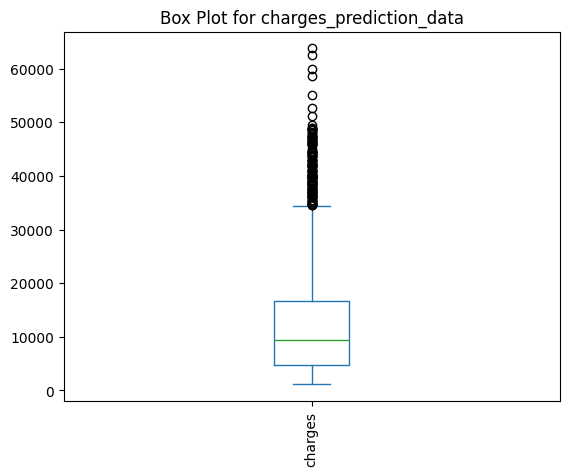

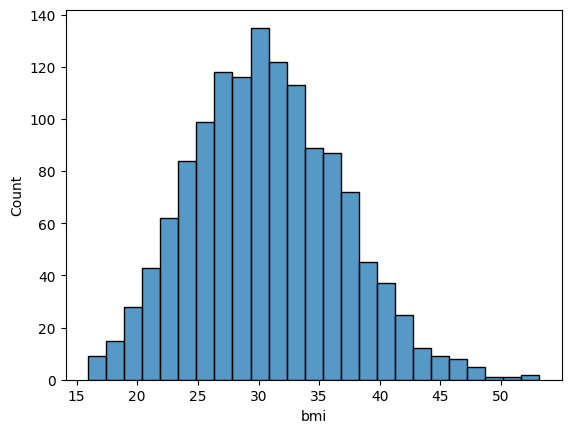

In [84]:
import matplotlib.pyplot as plt
import seaborn as sns
# Create a box plot for 'charges' to visualise outliers
plt.figure(figsize=(10, 7))
df.plot(kind='box', y=['charges'], rot=90)
plt.title('Box Plot for charges_prediction_data')
plt.show()
sns.histplot(df, x=df['bmi'])
plt.show()


In [82]:
# we are keeping the outliers in the charges collumn because they are relevant for our analysis
# The higher insurance charges are related to being smoker, high bmi, old age. so these factors are correlated.
high_values = df[df['charges'] > 50000]
#print(high_values)
print(high_values.head(50))

      age     sex     bmi  children smoker     region      charges BMI_Range  \
34     28    male  36.400         1    yes  southwest  51194.55914        50   
543    54  female  47.410         0    yes  southeast  63770.42801        50   
577    31  female  38.095         1    yes  northeast  58571.07448        50   
819    33  female  35.530         0    yes  northwest  55135.40209        40   
1146   60    male  32.800         0    yes  southwest  52590.82939        40   
1230   52    male  34.485         3    yes  northwest  60021.39897        40   
1300   45    male  30.360         0    yes  southeast  62592.87309        30   

      IsSex  IsSmoker  Region_Index AGE_Range  
34        0         1             2        20  
543       1         1             4        50  
577       1         1             3        20  
819       1         1             1        30  
1146      0         1             2        60  
1230      0         1             1        50  
1300      0         1  

In [85]:
df.to_csv(f'dataset/cleaned/insurance_cleaned.csv', index=False)